In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv', header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


the data has 1000 rows and 39 columns

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
pd.set_option('display.max_columns',None)
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,26-02-2015,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [5]:
df.columns = ['months_as_customer','age','policy_number','policy_bind_date','policy_state','policy_csl','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','incident_hour_of_day','number_of_vehicles','property_damage','bodily_injuries','witnesses','police_report_available','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year','fraud_reported']
pd.set_option('display.max_columns',None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_day,number_of_vehicles,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [6]:
df.shape

(1000, 39)

In [7]:
df.dtypes

months_as_customer           int64
age                          int64
policy_number                int64
policy_bind_date            object
policy_state                object
policy_csl                  object
policy_deductable            int64
policy_annual_premium      float64
umbrella_limit               int64
insured_zip                  int64
insured_sex                 object
insured_education_level     object
insured_occupation          object
insured_hobbies             object
insured_relationship        object
capital-gains                int64
capital-loss                 int64
incident_date               object
incident_type               object
collision_type              object
incident_severity           object
authorities_contacted       object
incident_state              object
incident_city               object
incident_location           object
incident_hour_of_day         int64
number_of_vehicles           int64
property_damage             object
bodily_injuries     

In [8]:
#Checking nulls
df.isnull().sum()

months_as_customer          0
age                         0
policy_number               0
policy_bind_date            0
policy_state                0
policy_csl                  0
policy_deductable           0
policy_annual_premium       0
umbrella_limit              0
insured_zip                 0
insured_sex                 0
insured_education_level     0
insured_occupation          0
insured_hobbies             0
insured_relationship        0
capital-gains               0
capital-loss                0
incident_date               0
incident_type               0
collision_type              0
incident_severity           0
authorities_contacted      91
incident_state              0
incident_city               0
incident_location           0
incident_hour_of_day        0
number_of_vehicles          0
property_damage             0
bodily_injuries             0
witnesses                   0
police_report_available     0
total_claim_amount          0
injury_claim                0
property_c

as we can see the data has null only in authorities contacted feature and we will deal with it with further analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   months_as_customer       1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   policy_number            1000 non-null   int64  
 3   policy_bind_date         1000 non-null   object 
 4   policy_state             1000 non-null   object 
 5   policy_csl               1000 non-null   object 
 6   policy_deductable        1000 non-null   int64  
 7   policy_annual_premium    1000 non-null   float64
 8   umbrella_limit           1000 non-null   int64  
 9   insured_zip              1000 non-null   int64  
 10  insured_sex              1000 non-null   object 
 11  insured_education_level  1000 non-null   object 
 12  insured_occupation       1000 non-null   object 
 13  insured_hobbies          1000 non-null   object 
 14  insured_relationship     

In [10]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


policy number is a unique feature we can make it the index or we can just drop it as well.

Policy bind date is a continuous type data and so is policy premium, zip , total claim, injury clain, property claim, vehicle claim, capital gains and capital loss.

In [11]:
for i in df:
    print(df[i].value_counts())
    print('\n')

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64


age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64


policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64


policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: count, L

there are only 3 states from which the policy were issued. Also policy csl also has only 3 types. 250/500 being the most and 500/1000 being the least.

for collision type we can see an entry of type ? which we will solve by encoding

We see same ? entry for 360 rows in property_damage and also for police_report_available has it for 343 rows. 

Rest all features seems to have proper data

We will start encoding the data and then go for analysis

In [12]:
df['fraud_reported'].replace({'N':0,'Y':1},inplace = True)
df['property_damage'].replace({'?':np.nan,'NO':0,'YES':1},inplace = True)
df['police_report_available'].replace({'?':np.nan,'NO':0,'YES':1},inplace = True)

we are replacing ? with np.nan to replace them using Iterative Imputer.

In [13]:
df.drop(['policy_bind_date','insured_hobbies','incident_date','incident_location'],axis = 1, inplace = True)


we will drop certain features which are not so Important for the label

In [14]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
enc_col = ['policy_state','policy_csl','policy_deductable','insured_sex','insured_education_level','insured_occupation','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','auto_make','auto_model']
for col in enc_col:
    df[col] = lab_enc.fit_transform(df[col])

We have used label Encoder on policy state, policy deductable, insured sex, insured education lavel, insured occupation,insured relationship,  incident type, collision type, incident severity, authorities contacted, incident state, incident city , auto make and auto model

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iter_impute = IterativeImputer()
iter_imp1 = pd.DataFrame(iter_impute.fit_transform(df[['police_report_available','fraud_reported']]),columns = ['police_report_available','fraud_reported'])
df['police_report_available'] = iter_imp1['police_report_available']        

In [21]:
iter_imp2 = pd.DataFrame(iter_impute.fit_transform(df[['property_damage','fraud_reported']]),columns = ['property_damage','fraud_reported'])
df['property_damage'] = iter_imp2['property_damage']

We have used Iterative imputer on police report available and property damage

In [22]:
for i in df:
    print(df[i].value_counts())
    print('\n')

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64


age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64


policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64


policy_state
2    352
0    338
1    310
Name: count, dtype: int64


policy_csl
1    351
0    349
2    300
Name: count, dtype: int64


policy_deductable
1    351
0    342
2    307
Name: count, dtype: int64




In [23]:
df.isnull().sum()

months_as_customer         0
age                        0
policy_number              0
policy_state               0
policy_csl                 0
policy_deductable          0
policy_annual_premium      0
umbrella_limit             0
insured_zip                0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_relationship       0
capital-gains              0
capital-loss               0
incident_type              0
collision_type             0
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_hour_of_day       0
number_of_vehicles         0
property_damage            0
bodily_injuries            0
witnesses                  0
police_report_available    0
total_claim_amount         0
injury_claim               0
property_claim             0
vehicle_claim              0
auto_make                  0
auto_model                 0
auto_year                  0
fraud_reported

<Axes: >

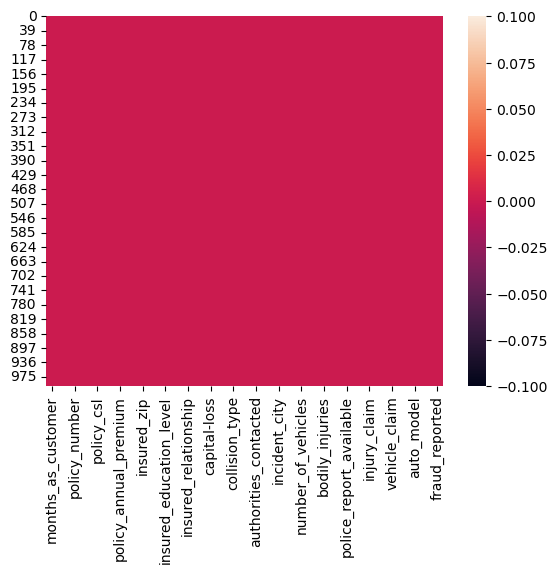

In [24]:
sns.heatmap(df.isnull())

In [28]:
df.shape

(1000, 35)

we can see the nulls have been removed and the shape is still 1000 entries

In [46]:
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_day,number_of_vehicles,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,0.965000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,6.653000,2.416000,25126.100000,-26793.700000,1.172000,1.666000,1.184000,1.859000,3.242000,2.966000,11.644000,1.83900,0.473315,0.992000,1.487000,0.477922,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,0.805247,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,4.019048,1.681003,27872.187708,28104.096686,1.081474,1.063755,0.939695,1.282483,2.155942,2.044266,6.951373,1.01888,0.399966,0.820127,1.111335,0.405085,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.00000,0.000000,0.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,0.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,3.000000,1.000000,0.000000,-51500.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,7.000000,2.000000,0.000000,-23250.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,12.000000,1.00000,0.457144,1.000000,1.000000,0.478206,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,10.000000,4.000000,51025.000000,0.000000,2.000000,3.000000,2.000000,3.000000,5.000000,5.000000,17.000000,3.00000,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,5.000000,100500.000000,0.000000,3.000000,3.000000,3.000000,4.000000,6.000000,6.000000,23.000000,4.00000,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


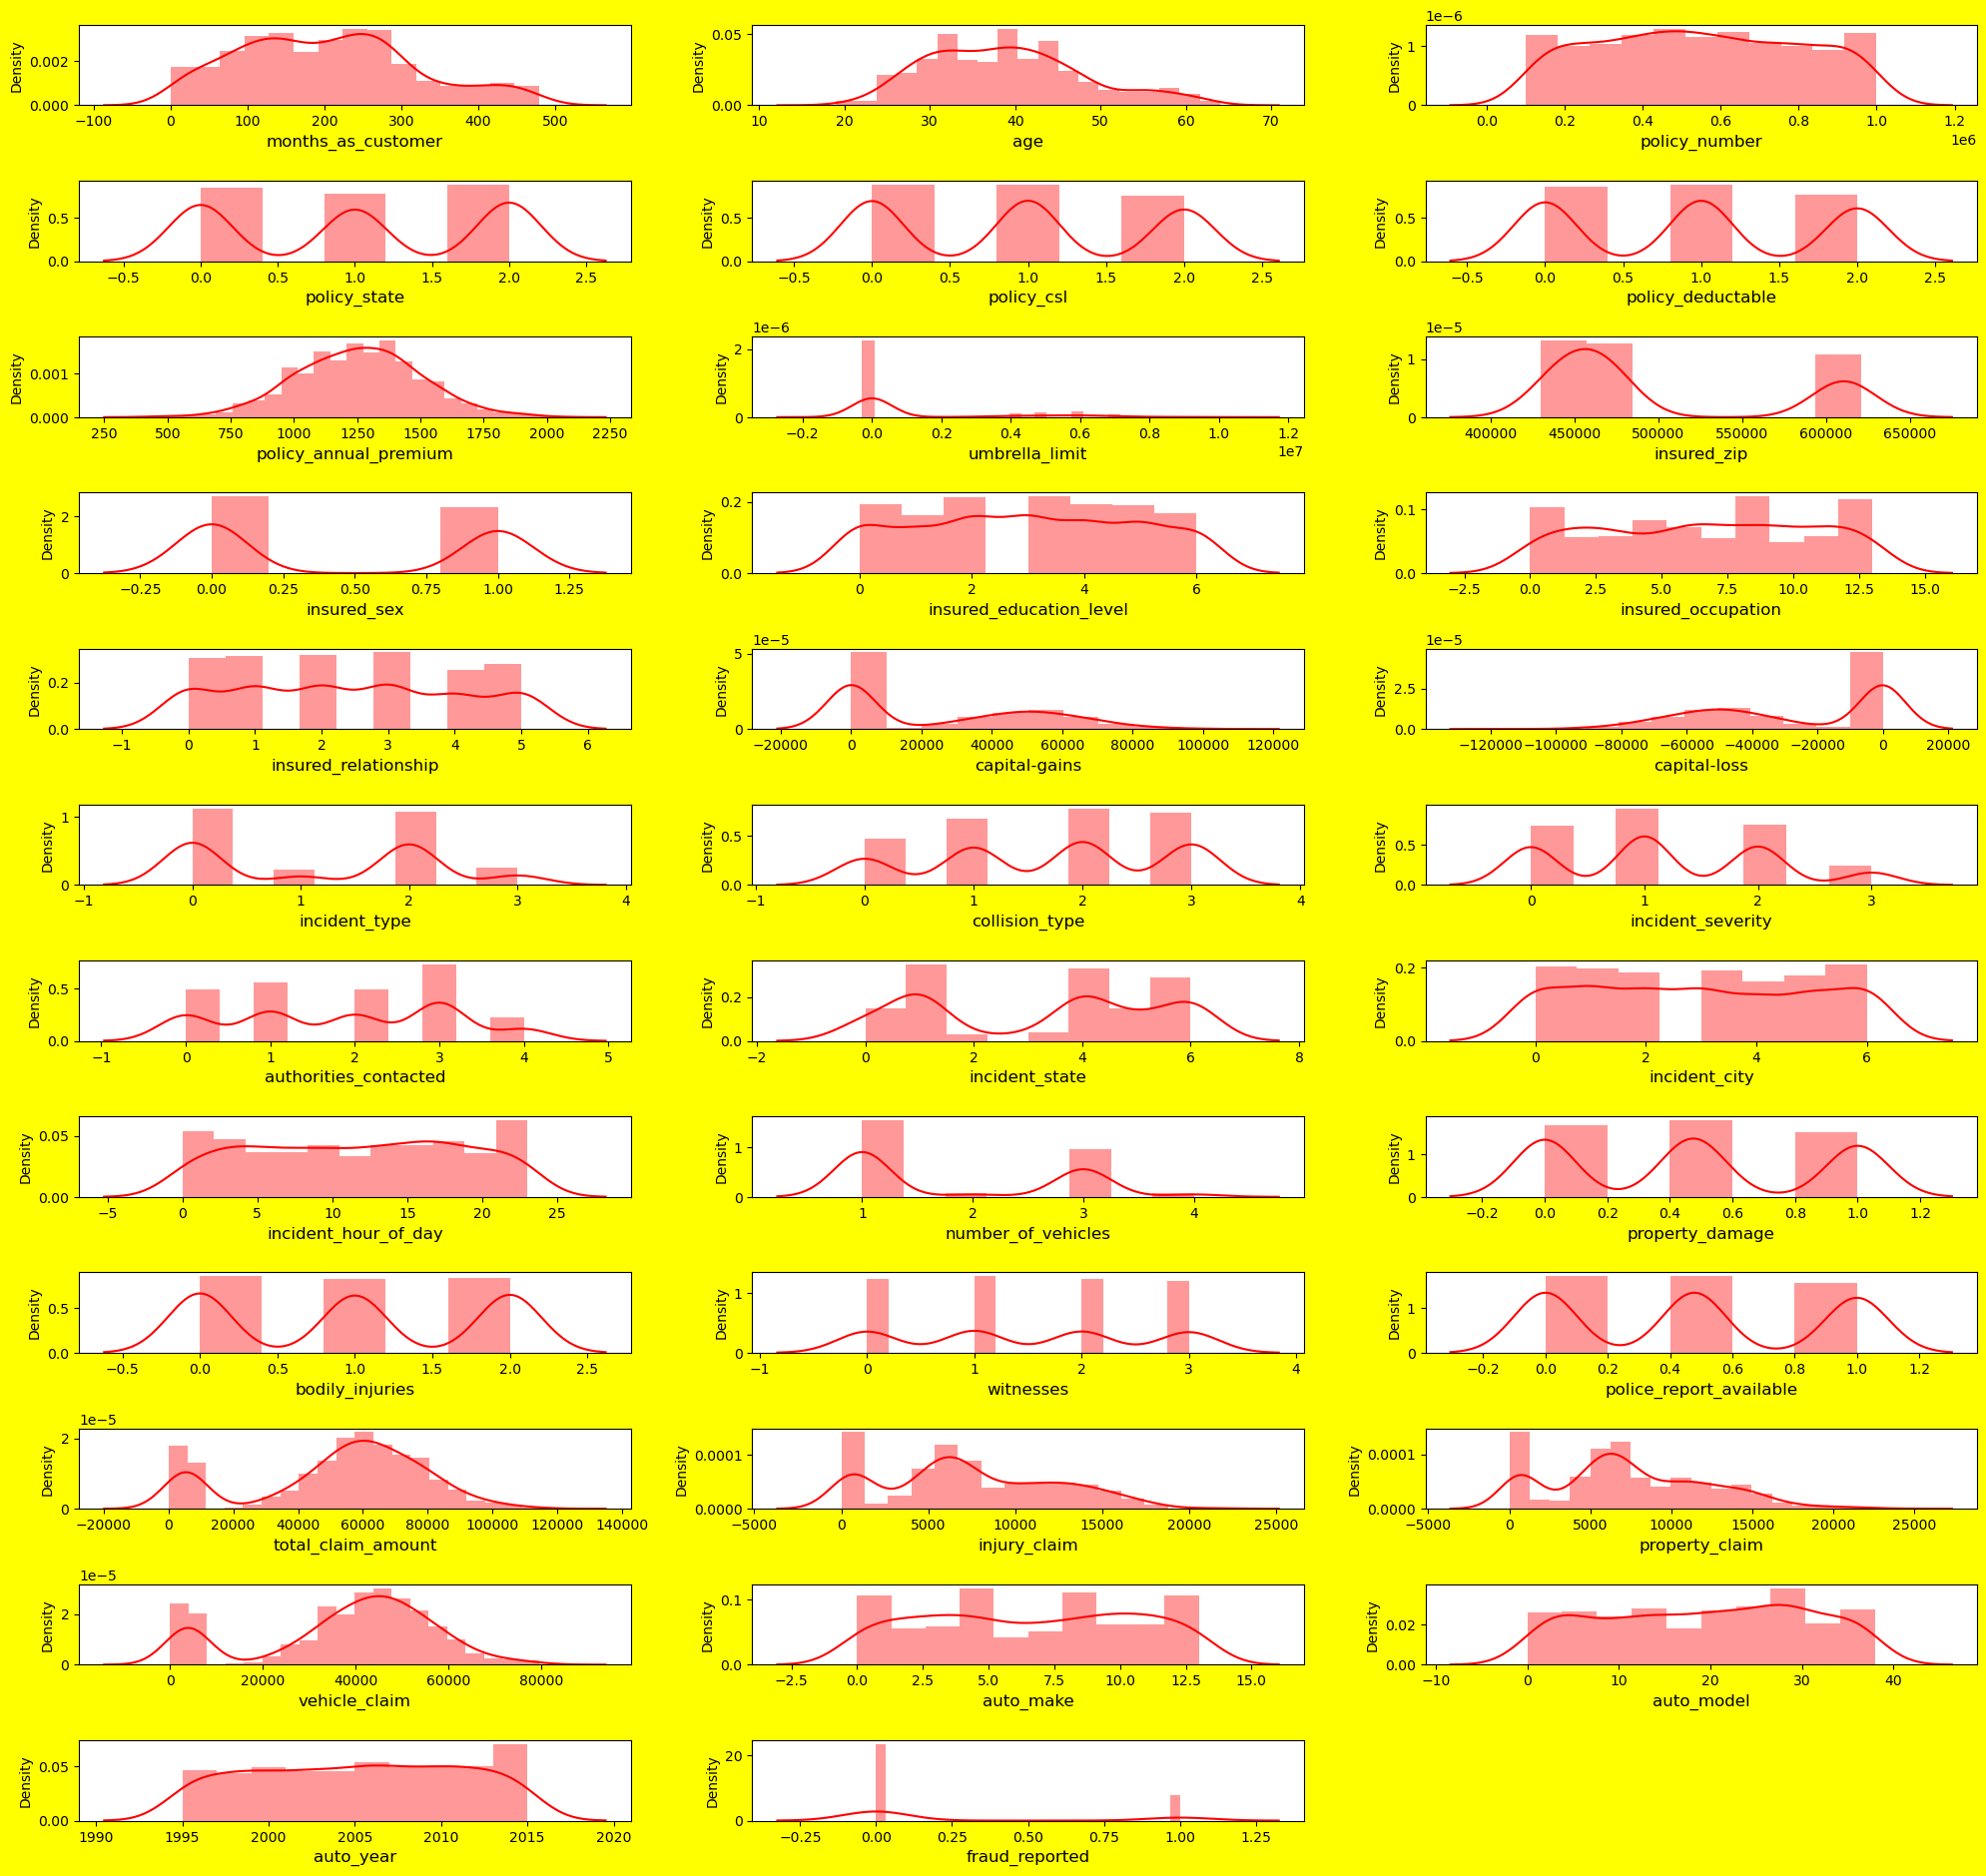

In [25]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 39:
        ax = plt.subplot(13,3,plotnumber)
        sns.distplot(df[column],color = "r")
        plt.xlabel(column, fontsize = 12)
    plotnumber+=1
plt.tight_layout()

we can observe

policy annual premium, umbrella limit, capital gains, capital loss,injury claim, property claim, all seem to have outliers present

<Figure size 500x500 with 0 Axes>

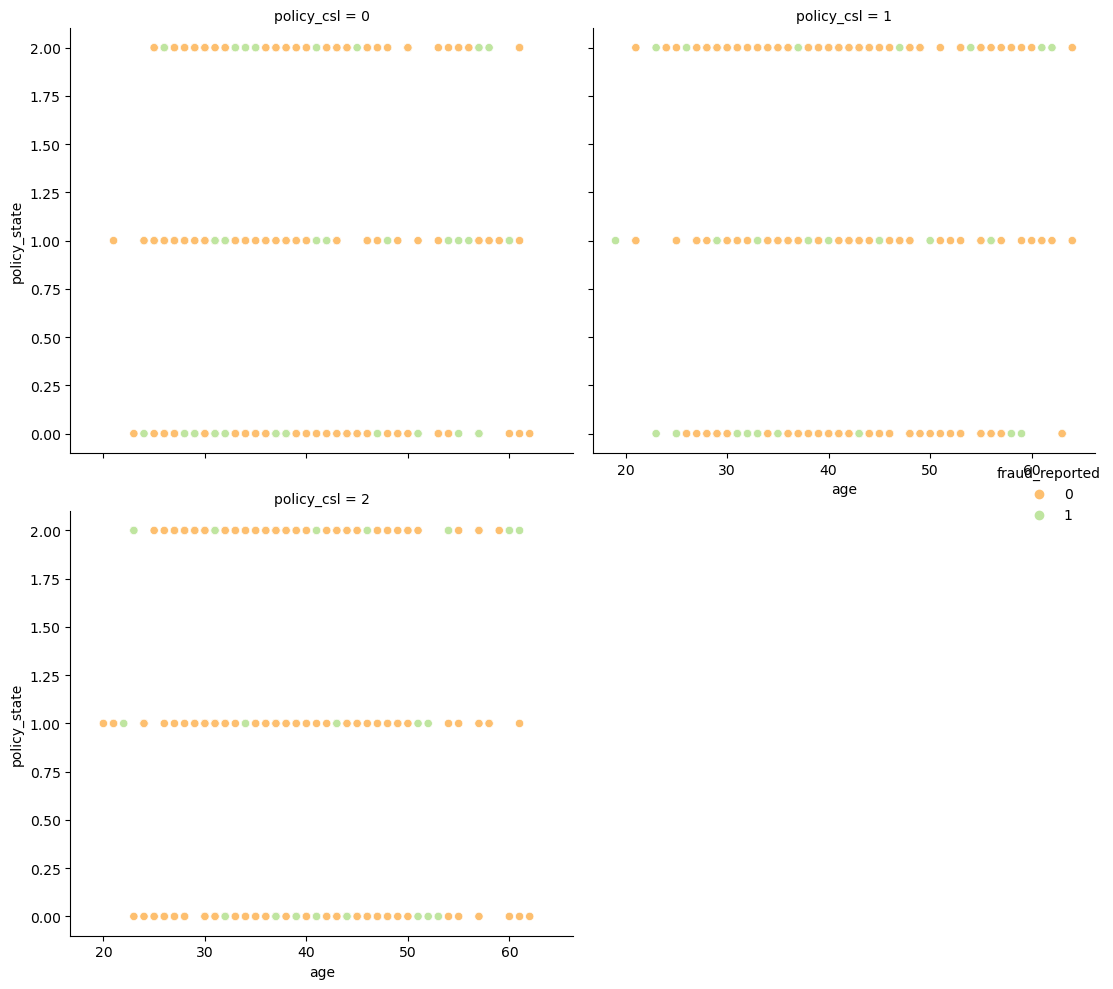

In [26]:
plt.figure(figsize=(5,5),facecolor="yellow")
sns.relplot(x=df['age'],y = df['policy_state'], hue = df['fraud_reported'] ,col = 'policy_csl',col_wrap = 2 ,data = df , palette = "Spectral")
plt.tight_layout()

As we can see the frauds are maximum for policy taken in Illinois followed closely by Indianopolis and least for Ohio.

<Figure size 500x500 with 0 Axes>

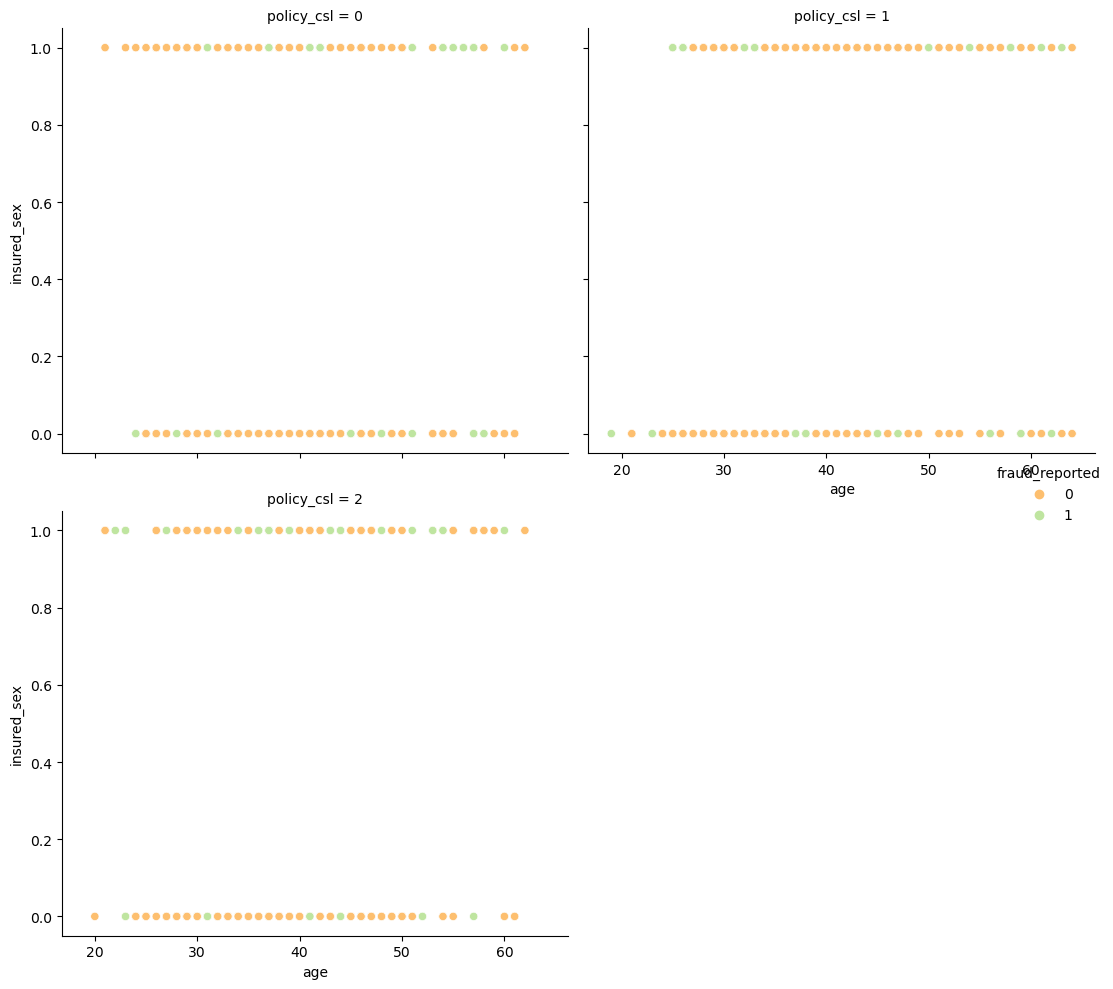

In [27]:
plt.figure(figsize=(5,5),facecolor="yellow")
sns.relplot(x=df['age'],y = df['insured_sex'], hue = df['fraud_reported'] ,col = 'policy_csl',col_wrap = 2 ,data = df , palette = "Spectral")
plt.tight_layout()

the policy frauds are most detected for males as compared to females.

<Figure size 500x500 with 0 Axes>

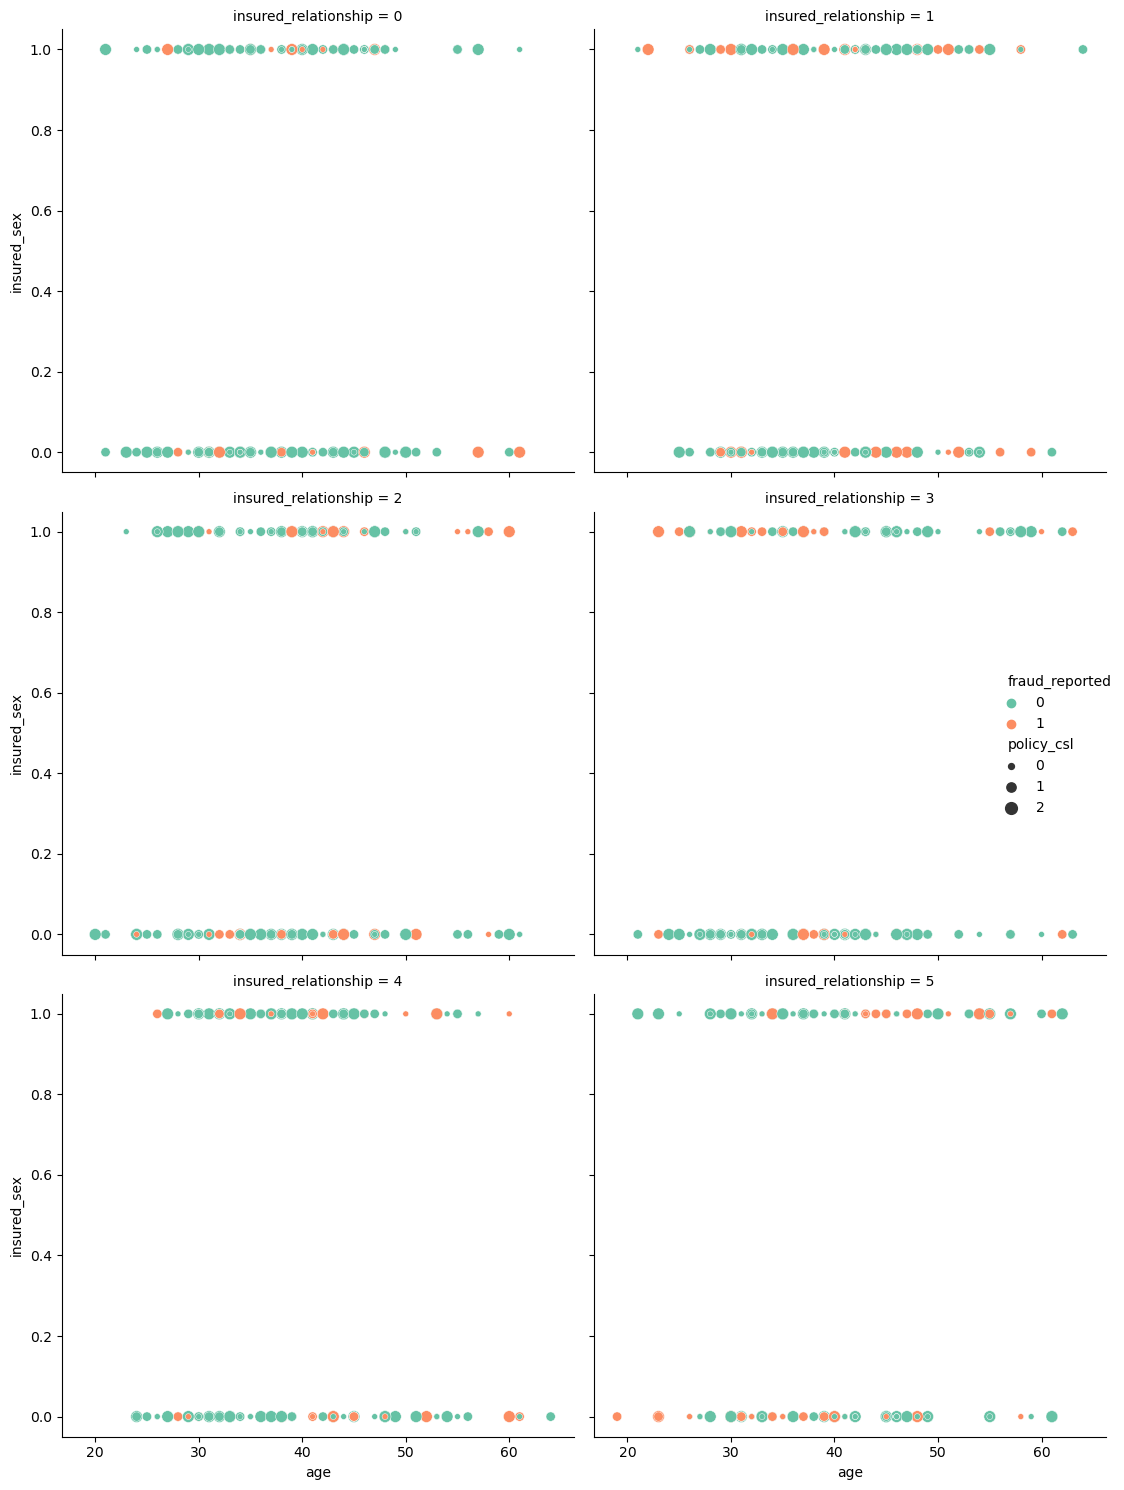

In [31]:
plt.figure(figsize=(5,5),facecolor="yellow")
sns.relplot(x=df['age'],y = df['insured_sex'], hue = df['fraud_reported'] ,col = 'insured_relationship', size = 'policy_csl',col_wrap = 2 ,data = df , palette = "Set2")
plt.tight_layout()

we can see for the first relationship that is husbands the accidents are more for csl 500/1000 which means a higher insurance can lead to the irresponsible driving which leads to more accident.

Again for people not in family for males and females we can see the one's who have taken policy_csl 2 have had more accidents followed by one's 250/500. higher cover can lead to less care while driving and hemce more accidents

Similar is the trend for rest of the relationship status as well.

<Figure size 500x500 with 0 Axes>

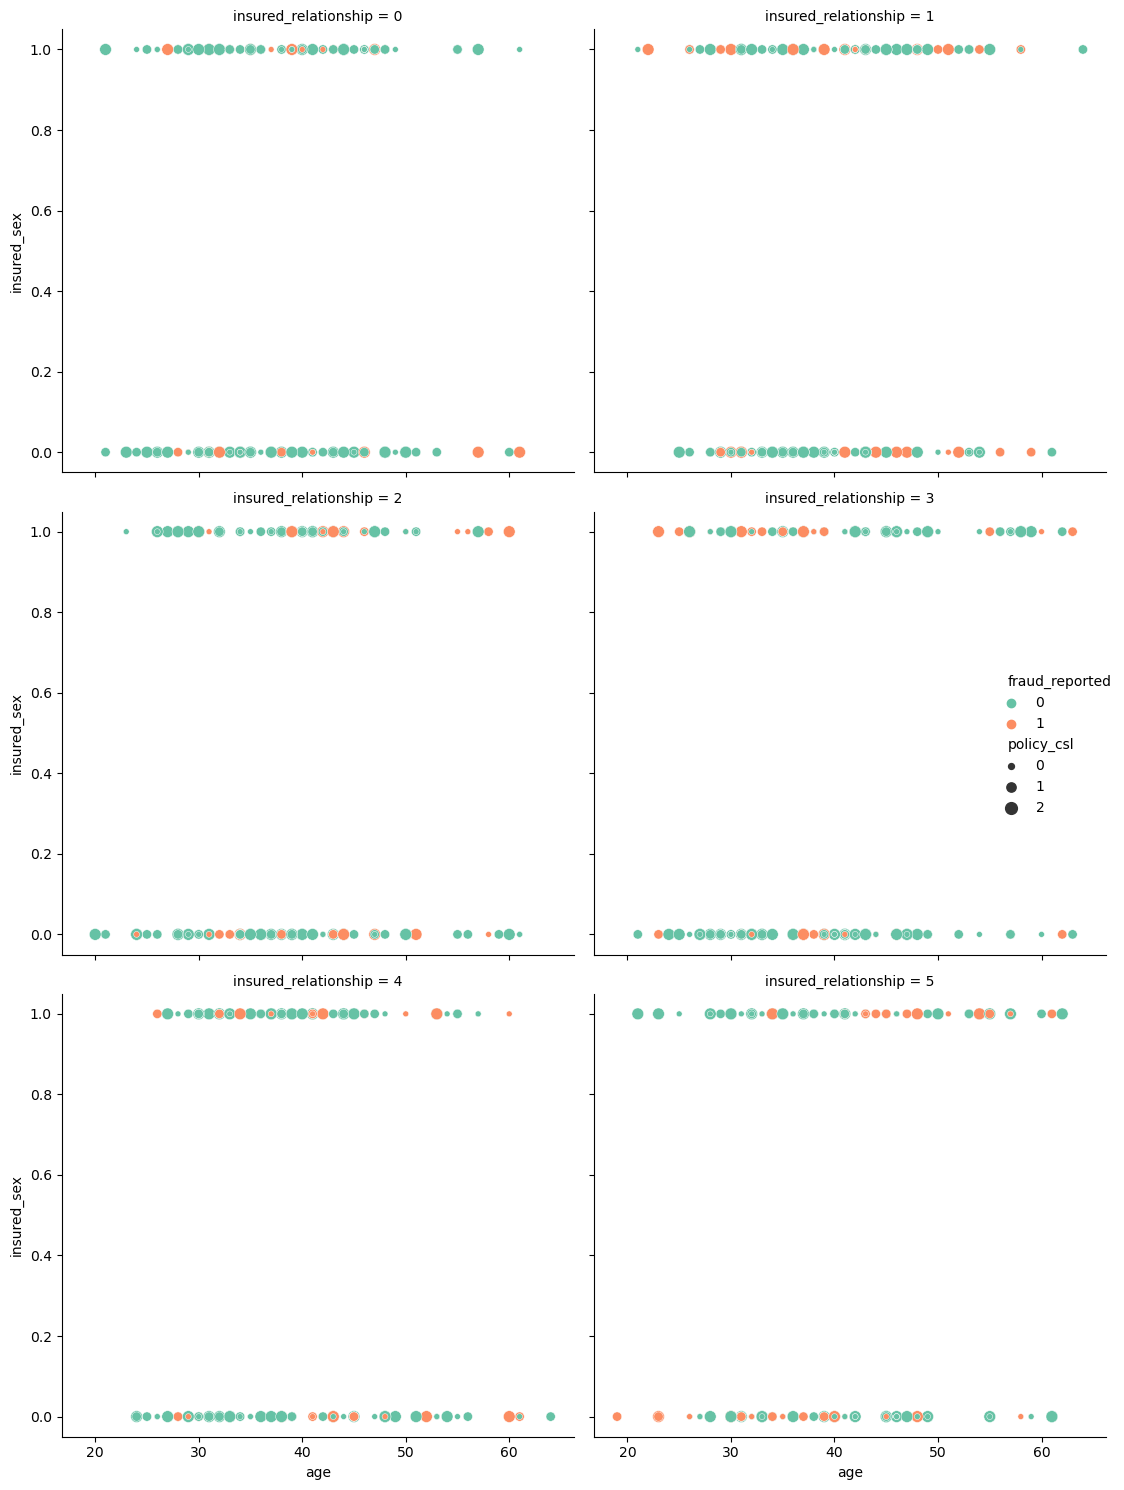

In [33]:
plt.figure(figsize=(5,5),facecolor="yellow")
sns.relplot(x=df['age'],y = df['insured_sex'], hue = df['fraud_reported'] ,col = 'insured_relationship', size = 'policy_csl',col_wrap = 2 ,data = df , palette = "Set2")
plt.tight_layout()

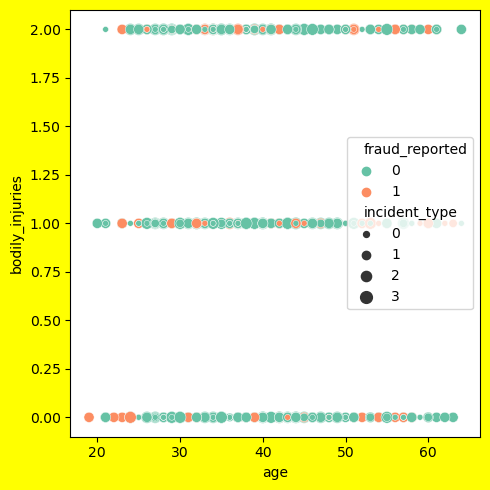

In [36]:
plt.figure(figsize=(5,5),facecolor="yellow")
sns.scatterplot(x=df['age'],y = df['bodily_injuries'], hue = df['fraud_reported'] ,size = 'incident_type', data = df , palette = "Set2")
plt.tight_layout()

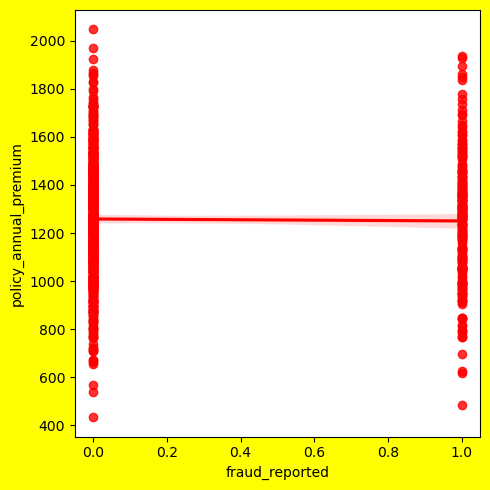

In [42]:
plt.figure(figsize=(5,5),facecolor="yellow")
sns.regplot(y=df['policy_annual_premium'],x = 'fraud_reported' , data = df , color = 'r')
plt.tight_layout()

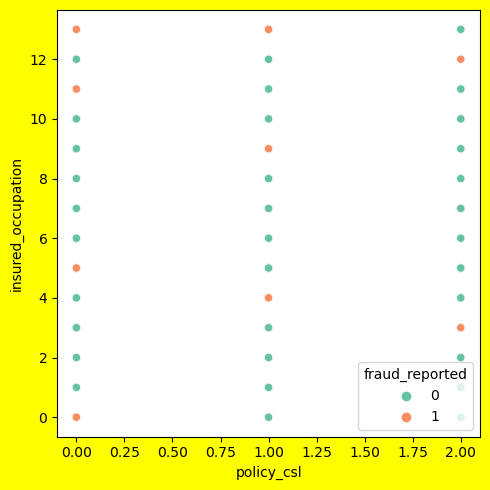

In [44]:
plt.figure(figsize=(5,5),facecolor="yellow")
sns.scatterplot(x=df['policy_csl'],y = df['insured_occupation'], hue = df['fraud_reported'] , data = df , palette = "Set2")
plt.tight_layout()

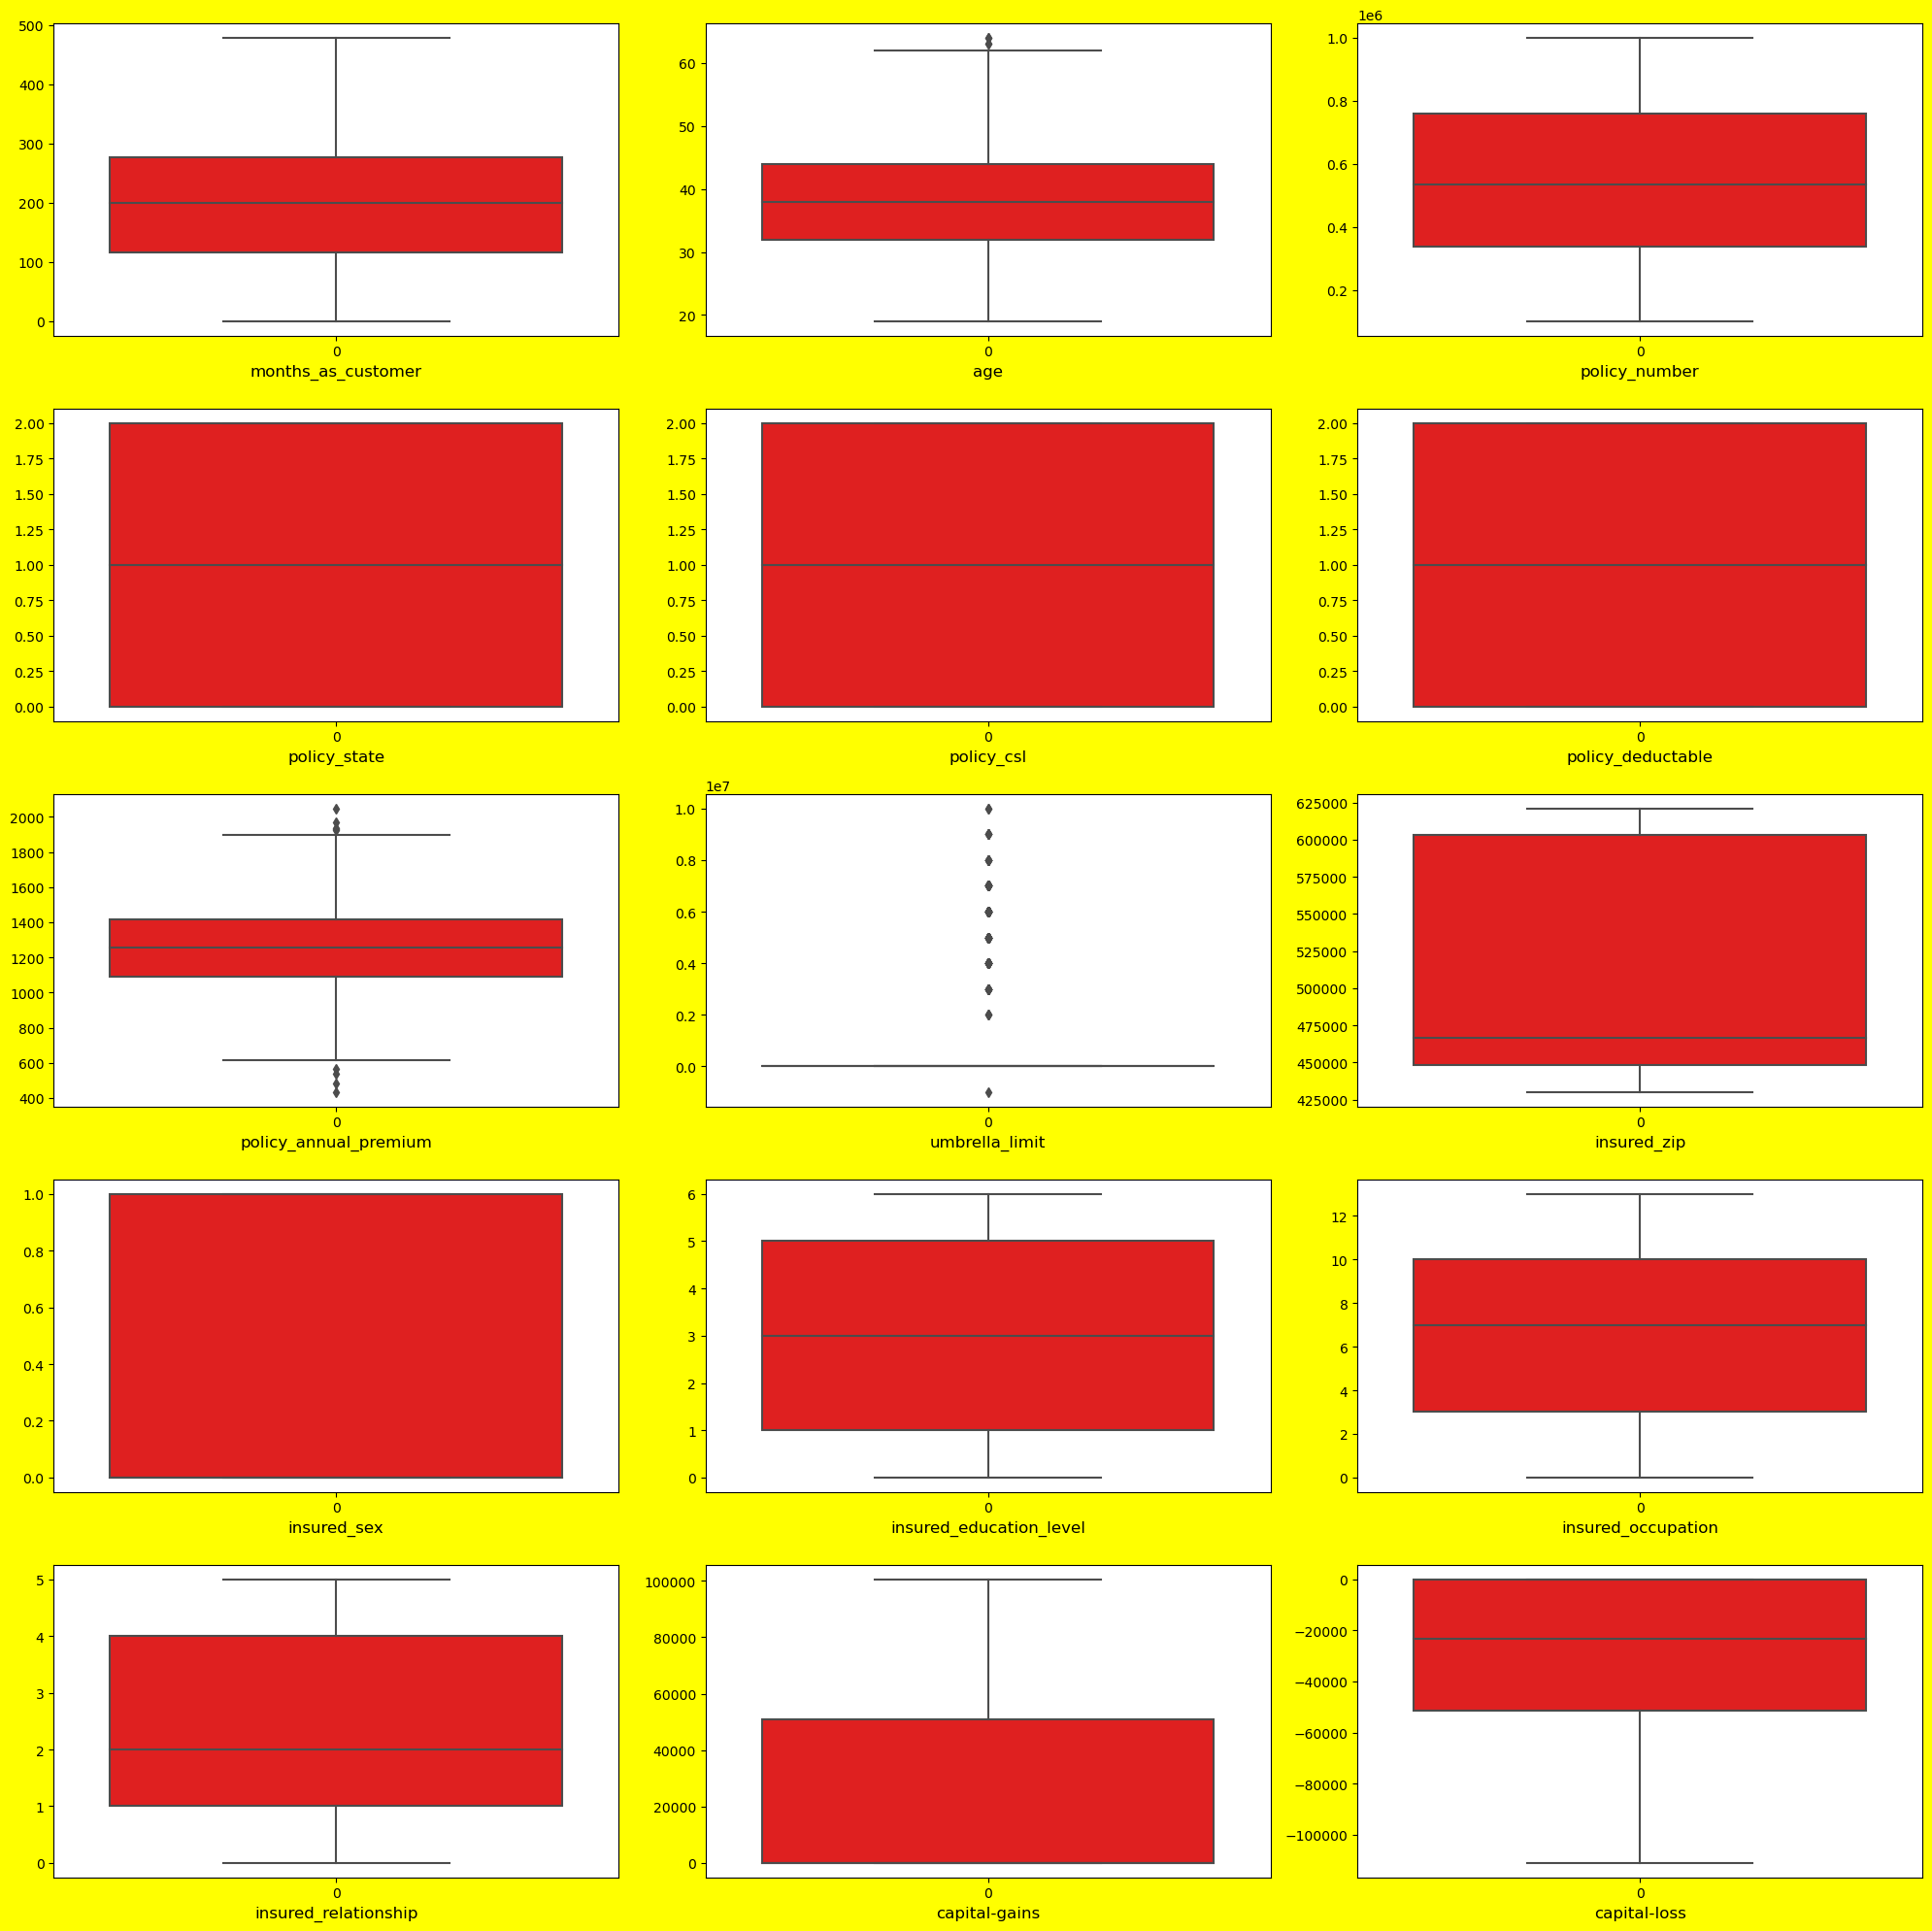

In [45]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column],color = "r")
        plt.xlabel(column, fontsize = 12)
    plotnumber+=1
plt.tight_layout()

In the box plot above we can see there are outliers but very negligible and hence we will not drop the values and let the model train 

In [47]:
df.skew()

months_as_customer         0.362177
age                        0.478988
policy_number              0.038991
policy_state              -0.026177
policy_csl                 0.088928
policy_deductable          0.063505
policy_annual_premium      0.004402
umbrella_limit             1.806712
insured_zip                0.816554
insured_sex                0.148630
insured_education_level   -0.000148
insured_occupation        -0.058881
insured_relationship       0.077488
capital-gains              0.478850
capital-loss              -0.391472
incident_type              0.101507
collision_type            -0.193345
incident_severity          0.279016
authorities_contacted     -0.034786
incident_state            -0.148865
incident_city              0.049531
incident_hour_of_day      -0.035584
number_of_vehicles         0.502664
property_damage            0.130010
bodily_injuries            0.014777
witnesses                  0.019636
police_report_available    0.109239
total_claim_amount        -0

the skewness is in acceptable range

In [48]:
corr = df.corr()
corr

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_day,number_of_vehicles,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.018481,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,0.069727,0.006399,0.020209,-0.017377,-0.017824,-0.059581,-0.005007,0.005369,-0.000130,0.070639,0.014736,0.002844,-0.010162,0.058383,-0.054390,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.020561,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,0.074832,-0.007075,0.007368,-0.025626,-0.018672,-0.058439,-0.002761,0.005770,-0.002291,0.087161,0.022102,-0.003082,-0.015679,0.052359,-0.048653,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.015058,0.022566,0.008968,0.007083,0.004564,-0.037264,-0.014422,0.017120,0.009802,-0.005669,0.001742,-0.013402,-0.015719,0.025593,-0.010064,-0.035406,0.000113,0.013432,-0.041224,-0.004558,-0.012661,0.022252,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.008213,0.012455,-0.029580,0.008777,-0.020481,-0.034327,-0.031215,-0.018506,0.074551,-0.030338,0.031848,0.034739,-0.026377,-0.003782,0.008723,-0.002077,0.029457,-0.042263,-0.024425,0.013384,0.022960,0.048135,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.001986,0.023978,0.021636,0.006879,-0.010757,0.009153,0.015788,-0.030063,0.005249,-0.034612,0.011997,-0.036687,0.022530,0.085463,0.032814,0.009333,-0.001869,-0.019403,-0.021473,-0.000595,0.071500,-0.005052,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.018481,0.020561,-0.015058,0.008213,0.001986,1.000000,0.001624,0.006783,-0.001064,-0.011948,0.012000,-0.053245,-0.025468,0.029668,-0.023106,-0.036759,-0.031190,-0.010001,0.004909,0.010650,-0.038425,0.066442,0.043148,0.009359,-0.020129,0.074994,0.038705,0.016792,0.034352,0.055172,0.000502,-0.030775,-0.003892,0.024921,0.007620
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,0.001624,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,0.001925,-0.013738,0.023547,0.053603,0.036719,-0.011155,-0.046963,0.046434,0.048724,-0.001578,-0.045991,0.043648,0.026780,0.002332,0.024269,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.006783,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,0.077495,-0.047268,-0.024056,0.015966,-0.025913,0.009466,0.030998,-0.077492,0.013094,-0.023257,-0.021270,-0.073601,0.022743,-0.006738,-0.022404,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,-0.001064,0.032354,0.019671,1.000000,-0.036942,0.016079,-0.069077,-0.002355,0.006303,0.049372,-0.010840,-0.045313,-0.023855,0.001072,-0.047669,-0.017532,0.008274,0.027448,-0.015982,0.028695,0.019805,0.033473,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.010757,-0.011948,0.038853,0.010688,-0.036942,1.000000,0.009002,-0.006160,0.002855,-0.020494,-0.021705,0.009952,-0.023310,-0.028168,0.030169,-0.022379,0.014470,0.019290,0.018793,0.018377,-0.020297,0.042463,-0.008130,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873


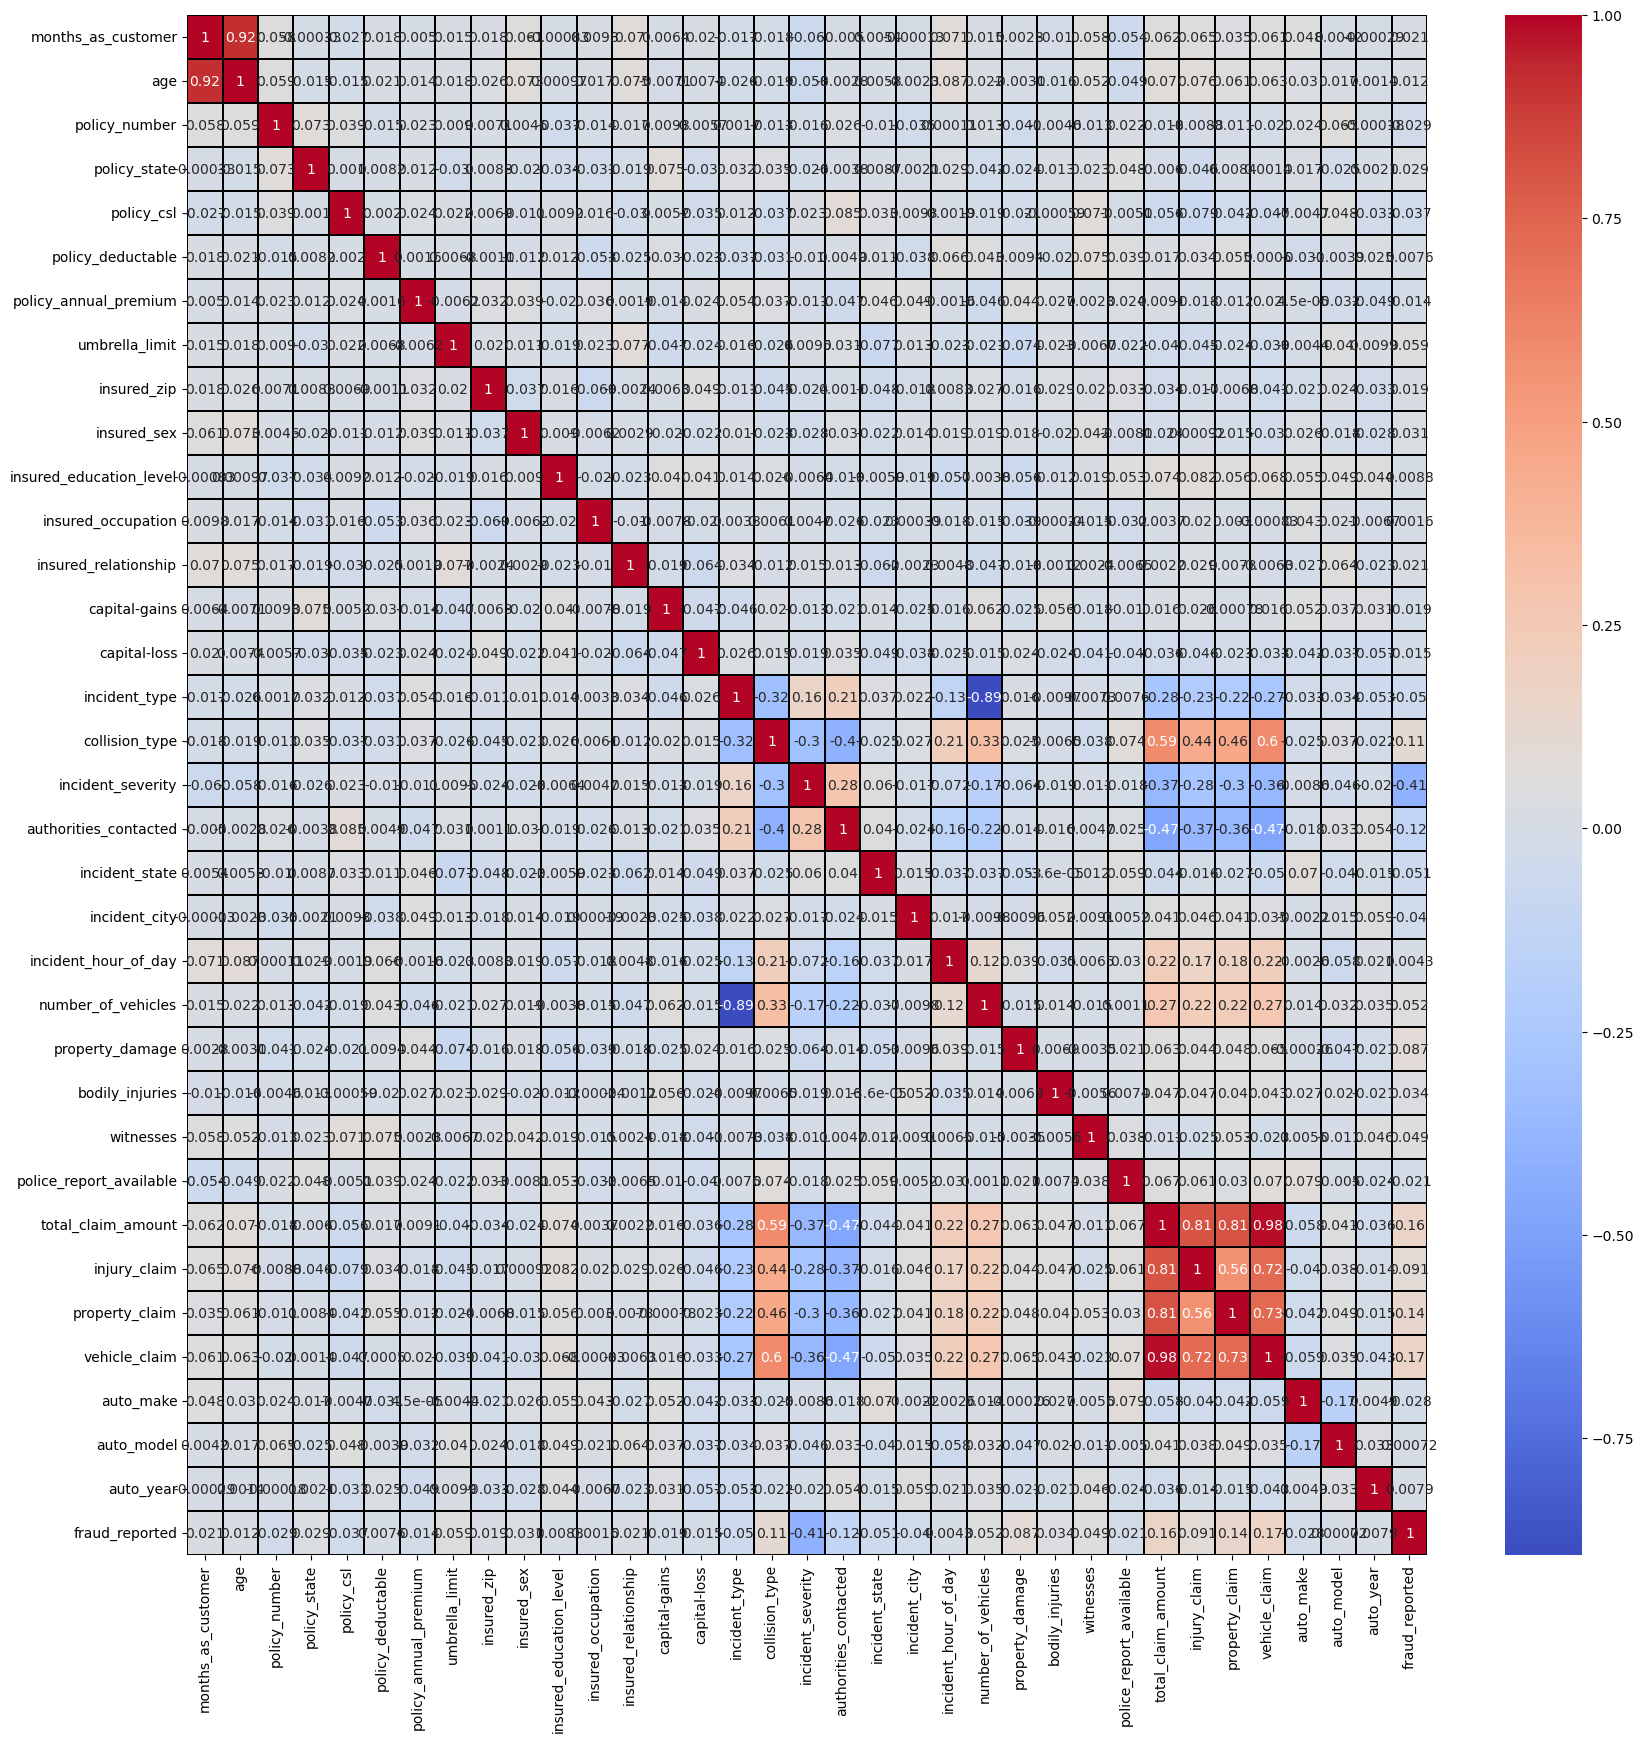

In [49]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),linewidth = 0.1,fmt = ".2g",annot = True,cmap = "coolwarm",linecolor = 'black')
plt.yticks(rotation = 0)
plt.show()

We can see the data has multicollinearity problem and we will drop features using VIF

In [50]:
x = df.drop(['fraud_reported'], axis = 1)
y = df['fraud_reported']

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_day,number_of_vehicles,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.078140,0.990836,-0.095953,1.187173,0.060937,0.043487,0.616705,-0.479476,-0.489529,1.076953,0.530931,-1.158316,-1.437957,1.011331,0.953851,0.766005,1.254675,-1.260614,0.890125,0.351762,-0.962196,-0.956261,-0.823865,1.317483,0.009759,0.461838,1.289453,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,-0.183440
1,0.208995,0.334073,-0.791527,-0.016856,0.060937,1.285962,-0.242521,1.697980,-0.461008,1.076953,0.530931,-0.162558,-0.247595,-0.901927,0.953851,1.691132,-1.566933,-0.195906,0.890125,0.815829,0.995476,-0.524475,-0.823865,0.123322,-1.210174,-1.338700,-0.002138,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,0.315491
2,-0.608002,-1.088913,0.550566,1.187173,-1.182668,1.285962,0.642233,1.697980,-0.984885,-0.928546,1.557877,1.082141,0.347586,0.358023,0.953851,-1.084249,0.314139,-0.195906,0.890125,-1.040437,-0.962196,-0.668404,1.140056,-1.183982,1.229693,1.362107,-1.180397,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,0.315491
3,0.452355,0.224613,-1.239334,-1.220886,0.060937,1.285962,0.652886,2.133471,1.491682,-0.928546,1.557877,-1.407256,0.942766,0.853388,-1.267577,0.766005,-0.626397,-1.260614,0.890125,-0.576371,-1.451614,-0.956261,-0.823865,0.123322,0.009759,0.461838,-1.180397,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074,1.479664
4,0.208995,0.552994,-0.695834,-1.220886,1.304542,0.043487,1.341980,2.133471,1.527808,1.076953,-1.522961,1.082141,0.942766,1.467210,-0.683741,1.691132,-1.566933,-0.195906,1.670253,-1.040437,-1.451614,1.202666,-0.823865,-1.183982,-1.210174,-0.438431,-1.180397,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.539740,1.187173,1.304542,0.043487,0.222884,-0.479476,-0.975717,-0.928546,1.044404,-1.158316,0.942766,-0.901927,0.953851,0.766005,-0.626397,-0.195906,-0.670129,-1.504504,0.506058,1.202666,-0.823865,1.317483,-1.210174,-0.438431,0.000701,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528,0.149180
996,0.704407,0.224613,-1.398429,-1.220886,-1.182668,0.043487,0.739141,-0.479476,1.492519,-0.928546,1.557877,0.584261,1.537947,1.643100,0.953851,0.766005,0.314139,-1.260614,-0.670129,0.351762,0.016640,1.634452,-0.823865,1.317483,1.229693,1.362107,0.000701,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,1.645974
997,-0.642767,-0.541611,1.448920,1.187173,0.060937,-1.198989,0.520739,0.826998,-0.815138,-0.928546,1.044404,-1.407256,-0.247595,0.358023,0.953851,-1.084249,1.254675,-0.195906,0.890125,-1.504504,-1.451614,-1.100189,1.140056,-0.040452,1.229693,1.362107,1.289453,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570,-1.513924
998,2.208028,2.523284,-0.047867,-1.220886,1.304542,1.285962,0.411866,1.697980,-0.830250,1.076953,-1.522961,-0.411497,1.537947,-0.901927,0.953851,0.766005,0.314139,-1.260614,0.109998,-1.040437,-1.451614,-1.388046,-0.823865,-0.040452,-1.210174,-0.438431,1.289453,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371,-1.181303


the data has been standardised and we will now use VIF

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["features"] = x.columns
vif

,VIF values,features
0,6.826033,months_as_customer
1,6.846767,age
2,1.026318,policy_number
3,1.033522,policy_state
4,1.030453,policy_csl
5,1.034894,policy_deductable
6,1.030990,policy_annual_premium
7,1.028307,umbrella_limit
8,1.030405,insured_zip
9,1.026605,insured_sex


In [53]:
x.drop(['total_claim_amount','vehicle_claim','property_claim'],axis =1,inplace = True)

We could see the data has has correlation in Total claim amount, vehicle claim and property claim. we drop them and check the VIF again

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["features"] = x.columns
vif

,VIF values,features
0,6.761284,months_as_customer
1,6.793083,age
2,1.025884,policy_number
3,1.032707,policy_state
4,1.029183,policy_csl
5,1.028457,policy_deductable
6,1.028635,policy_annual_premium
7,1.028274,umbrella_limit
8,1.026783,insured_zip
9,1.024599,insured_sex


In [55]:
x.drop('age',axis = 1, inplace = True)

We will also drop age 

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["features"] = x.columns
vif

,VIF values,features
0,1.040045,months_as_customer
1,1.025656,policy_number
2,1.031710,policy_state
3,1.028653,policy_csl
4,1.028445,policy_deductable
5,1.027813,policy_annual_premium
6,1.028252,umbrella_limit
7,1.026159,insured_zip
8,1.022735,insured_sex
9,1.039589,insured_education_level


In [57]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

we are using smote to bring value counts of the labels to be more same

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred = RFC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ",maxAccu , " at random state ", maxRs )

Best accuracy is  0.9668874172185431  at random state  15


The test model has given best accuracy of 96% at random state 15. We will split the data for this random state.

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = maxRs)

In [62]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [63]:
rfc = RandomForestClassifier()
ET = ExtraTreesClassifier()
knn = KNeighborsClassifier()
DT = DecisionTreeClassifier()
lr = LogisticRegression()
svc = SVC()
gb = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
BGC = BaggingClassifier()

In [64]:
models = {'Logistic Regression':lr, 'Random Forest Classifier':rfc ,'Extra Tree Classifier': ET,'K Neighbor Classifier' : knn,'Decision Tree Classifier': DT,'Support Vector Classifier': svc,'Gradient Boosting Classifier':gb,'Ada Boost Classifier':ABC,'Bagging Classifier':BGC}
for name, model in models.items():
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print("following is the score of ",name)
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred) )
    score = cross_val_score(model,x,y)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross val score is : ",accuracy_score(y_test,pred) - score.mean())
    print("\n\n")

following is the score of  Logistic Regression
0.7649006622516556
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       147
           1       0.76      0.79      0.77       155

    accuracy                           0.76       302
   macro avg       0.77      0.76      0.76       302
weighted avg       0.76      0.76      0.76       302

[[109  38]
 [ 33 122]]
[0.74172185 0.72757475 0.75415282 0.75747508 0.74086379]
0.7443576598974719
Difference between Accuracy score and cross val score is :  0.020543002354183715



following is the score of  Random Forest Classifier
0.956953642384106
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       147
           1       0.98      0.94      0.96       155

    accuracy                           0.96       302
   macro avg       0.96      0.96      0.96       302
weighted avg       0.96      0.96      0.96       302

[[144   3]
 [ 10 145]]
[0.8

We can see that Gradient Boosting has given the best accuracy of 97.68% with a cross val of 0.0305 and we will use it for tuning.

In [67]:
from sklearn.model_selection import GridSearchCV
params = {
    'loss':['log_loss','exponential'],
    'learning_rate' :[0.01,0.02,0.05,0.005,0.1,0.5,0.6,0.001],
    'n_estimators' : [10,20,50,100,200],
    'criterion':['friedman_mse','squared_error'],
    'min_samples_leaf': range(2,5),
    'min_samples_split':range(3,6),
}

In [68]:
GBC_cv = GridSearchCV(estimator = gb,param_grid = params, cv = 5, n_jobs = -1)
GBC_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.02, 0.05, 0.005, 0.1, 0.5,
                                           0.6, 0.001],
                         'loss': ['log_loss', 'exponential'],
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(3, 6),
                         'n_estimators': [10, 20, 50, 100, 200]})

In [69]:
best_param = GBC_cv.best_params_
print(best_param)

{'criterion': 'friedman_mse', 'learning_rate': 0.6, 'loss': 'exponential', 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 10}


In [70]:
model = GradientBoostingClassifier(criterion = 'friedman_mse',learning_rate = 0.6,loss = 'exponential',min_samples_split=3,min_samples_leaf = 4,n_estimators=10)
model.fit(x_train,y_train)
pred = model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

96.02649006622516


In [74]:
model1 = GradientBoostingClassifier(criterion = 'friedman_mse',learning_rate = 0.55,loss = 'exponential',min_samples_split=3,min_samples_leaf = 4,n_estimators=10)
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

97.68211920529801


this is the best performing model for criterion friedman mse, learning rate 0.55, loss kept exponential, min samples split  3 min samples leaf 4 and estimators 10

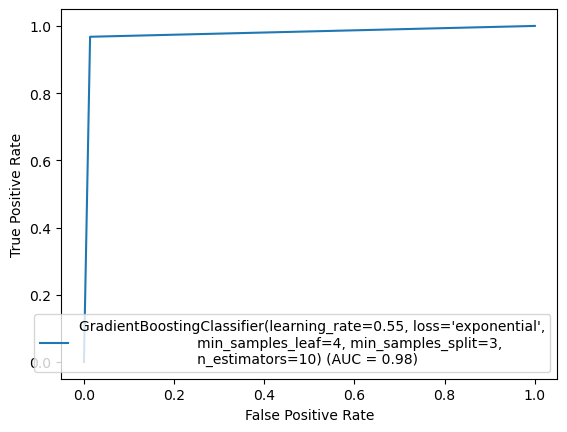

In [76]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name = model1)
display.plot()

We have plotted the roc curve and can now save the model

In [77]:
import pickle
pickle.dump(model1,open('GBC_Insurance_fraud_pred_model','wb'))